# KNN no `chb22_com_dwt`

Explorando 20 rodadas de classificação com `KNN` em sua configuração padrão com o dataframe extraído com DWT para encontrar canal com melhor desempenho.

Por fim salvando a tabela com médias, desvios padrão e medianas do desempenho de cada canal.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_array = np.load('./../20_seeds.npy')
print(f'seeds: {seed_array}')

seeds: [4382 8968 8442 1729  290  490 2128 1167 8900 5078 1359  894 7809 6990
 3623 5906 1687 7080 5473 7854]


## 20 rodadas

In [2]:
chb_DF = pd.read_csv('./chb22_com_dwt.csv')
target_S = chb_DF.pop('target')

accuracy_DF = pd.DataFrame()

# agrupa todas colunas pelo mesmo número do canal
colunas_agrupadas_por_numero = []
for i in range(18):
    colunas_agrupadas_por_numero.append(
        [column for column in chb_DF.columns if f'{i}' in column.split('-')]
    )

for numero_da_coluna, colunas in enumerate(colunas_agrupadas_por_numero):
    X, y = chb_DF[colunas].values, target_S.values

    acc = []   

    for seed in seed_array:
        # Distribuindo os dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
        
        # Instanciando e treinando classificador
        model = KNeighborsClassifier().fit(X_train, y_train)

        # Adicionando resultados às respectivas listas
        acc.append(model.score(X_test, y_test))

    accuracy_DF[f'{numero_da_coluna}'] = acc

accuracy_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.833333,0.916667,0.983333,0.966667,0.883333,0.916667,0.900000,0.950000,0.783333,0.866667,0.833333,0.933333,0.733333,0.783333,0.883333,0.933333,1.000000,0.850000
1,0.883333,0.950000,0.966667,1.000000,0.933333,0.966667,0.966667,0.966667,0.866667,0.966667,0.916667,0.983333,0.850000,0.933333,0.933333,0.950000,0.983333,0.950000
2,0.766667,0.916667,0.950000,0.916667,0.800000,0.916667,0.900000,0.916667,0.666667,0.900000,0.900000,0.916667,0.733333,0.766667,0.900000,0.900000,0.983333,0.883333
3,0.883333,0.966667,1.000000,0.983333,0.883333,0.950000,0.950000,0.966667,0.833333,0.933333,0.900000,0.950000,0.900000,0.933333,0.950000,0.933333,1.000000,0.900000
4,0.916667,0.933333,0.950000,0.950000,0.883333,0.933333,0.816667,0.850000,0.850000,0.866667,0.883333,0.950000,0.733333,0.850000,0.866667,0.933333,0.966667,0.883333
5,0.883333,0.983333,0.983333,1.000000,0.883333,0.950000,0.883333,0.966667,0.833333,0.916667,0.900000,0.966667,0.833333,0.883333,0.933333,0.983333,0.983333,0.916667
6,0.833333,0.916667,0.966667,0.983333,0.866667,0.950000,0.933333,0.933333,0.750000,0.950000,0.900000,0.966667,0.816667,0.866667,0.933333,1.000000,0.983333,0.916667
7,0.866667,0.916667,0.916667,0.966667,0.850000,0.916667,0.933333,0.900000,0.716667,0.916667,0.866667,0.950000,0.783333,0.833333,0.883333,0.966667,0.950000,0.833333
8,0.783333,0.950000,0.966667,0.933333,0.833333,0.916667,0.933333,0.933333,0.766667,0.883333,0.800000,0.900000,0.766667,0.866667,0.883333,0.900000,0.966667,0.833333
9,0.833333,0.933333,0.966667,0.983333,0.916667,0.916667,0.866667,0.950000,0.733333,0.916667,0.866667,0.883333,0.783333,0.850000,0.900000,0.916667,0.983333,0.866667


,count,mean,std,min,25%,50%,75%,max
16,20.0,0.983333,0.015294,0.950000,0.966667,0.983333,1.000000,1.000000
3,20.0,0.971667,0.022361,0.916667,0.966667,0.983333,0.983333,1.000000
2,20.0,0.970000,0.022031,0.916667,0.962500,0.966667,0.983333,1.000000
7,20.0,0.946667,0.033157,0.850000,0.933333,0.950000,0.966667,1.000000
15,20.0,0.945833,0.033278,0.900000,0.916667,0.933333,0.983333,1.000000
11,20.0,0.945833,0.031472,0.883333,0.933333,0.950000,0.966667,0.983333
5,20.0,0.944167,0.027718,0.916667,0.916667,0.941667,0.954167,1.000000
1,20.0,0.938333,0.023005,0.883333,0.916667,0.941667,0.950000,0.983333
9,20.0,0.917500,0.034824,0.850000,0.900000,0.916667,0.937500,0.966667
6,20.0,0.916667,0.039736,0.816667,0.895833,0.933333,0.937500,0.966667


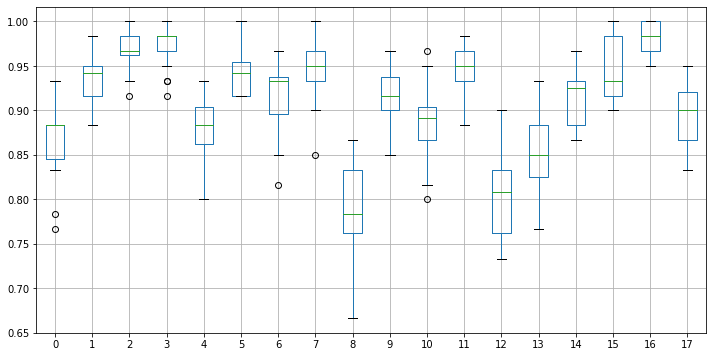

In [3]:
accuracy_DF.boxplot(figsize=(12, 6))
accuracy_DF.describe().transpose().sort_values(by='mean', ascending=False)

## Salvando rank em arquivo csv

In [4]:
save_DF = accuracy_DF.describe().transpose()[['mean', 'std', '50%']]
save_DF['chb'] = '22'
save_DF['channel'] = save_DF.index

save_DF.to_csv(path_or_buf='./knn_descr_channel_rank.csv', index=False)
save_DF

,mean,std,50%,chb,channel
0,0.868333,0.042543,0.883333,22,0
1,0.938333,0.023005,0.941667,22,1
2,0.970000,0.022031,0.966667,22,2
3,0.971667,0.022361,0.983333,22,3
4,0.880000,0.036515,0.883333,22,4
5,0.944167,0.027718,0.941667,22,5
6,0.916667,0.039736,0.933333,22,6
7,0.946667,0.033157,0.950000,22,7
8,0.788333,0.050175,0.783333,22,8
9,0.917500,0.034824,0.916667,22,9
